In [4]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# AIRE
# Cargamos el archivo
aire_data = pd.read_json('final_airQuality_dataset.json')
print(len(aire_data))
aire_data.head()

135030


Day  Cell        NO       SO2  ...         O3      PM2.5       PM10      C6H6
0    1   632  2.862296  3.920368  ...  62.542806  11.756215  19.655081  0.000149
1    1   731  1.197245  7.252647  ...  72.342491  11.756215  19.655081  0.132303
2    1   732  1.918880  5.683545  ...  67.735192  11.756215  15.553296  0.665350
3    1   733  5.354259  3.560602  ...  51.998919  11.756215  15.322981  0.086330
4    1   734  3.164620  2.206142  ...  58.380236  11.756215  13.393692  0.080844

[5 rows x 11 columns]

In [6]:
aire_data.describe()

Day           Cell  ...           PM10           C6H6
count  135030.000000  135030.000000  ...  135030.000000  135030.000000
mean       15.514130    5268.456854  ...      19.655081       0.953770
std         8.679982    2022.945917  ...      10.082903       0.491570
min         1.000000     632.000000  ...       1.040275       0.000000
25%         8.000000    3728.000000  ...      12.640387       0.610845
50%        16.000000    5380.000000  ...      17.678963       0.877731
75%        23.000000    6939.000000  ...      24.365684       1.226124
max        30.000000    8927.000000  ...      73.587154       3.446366

[8 rows x 11 columns]

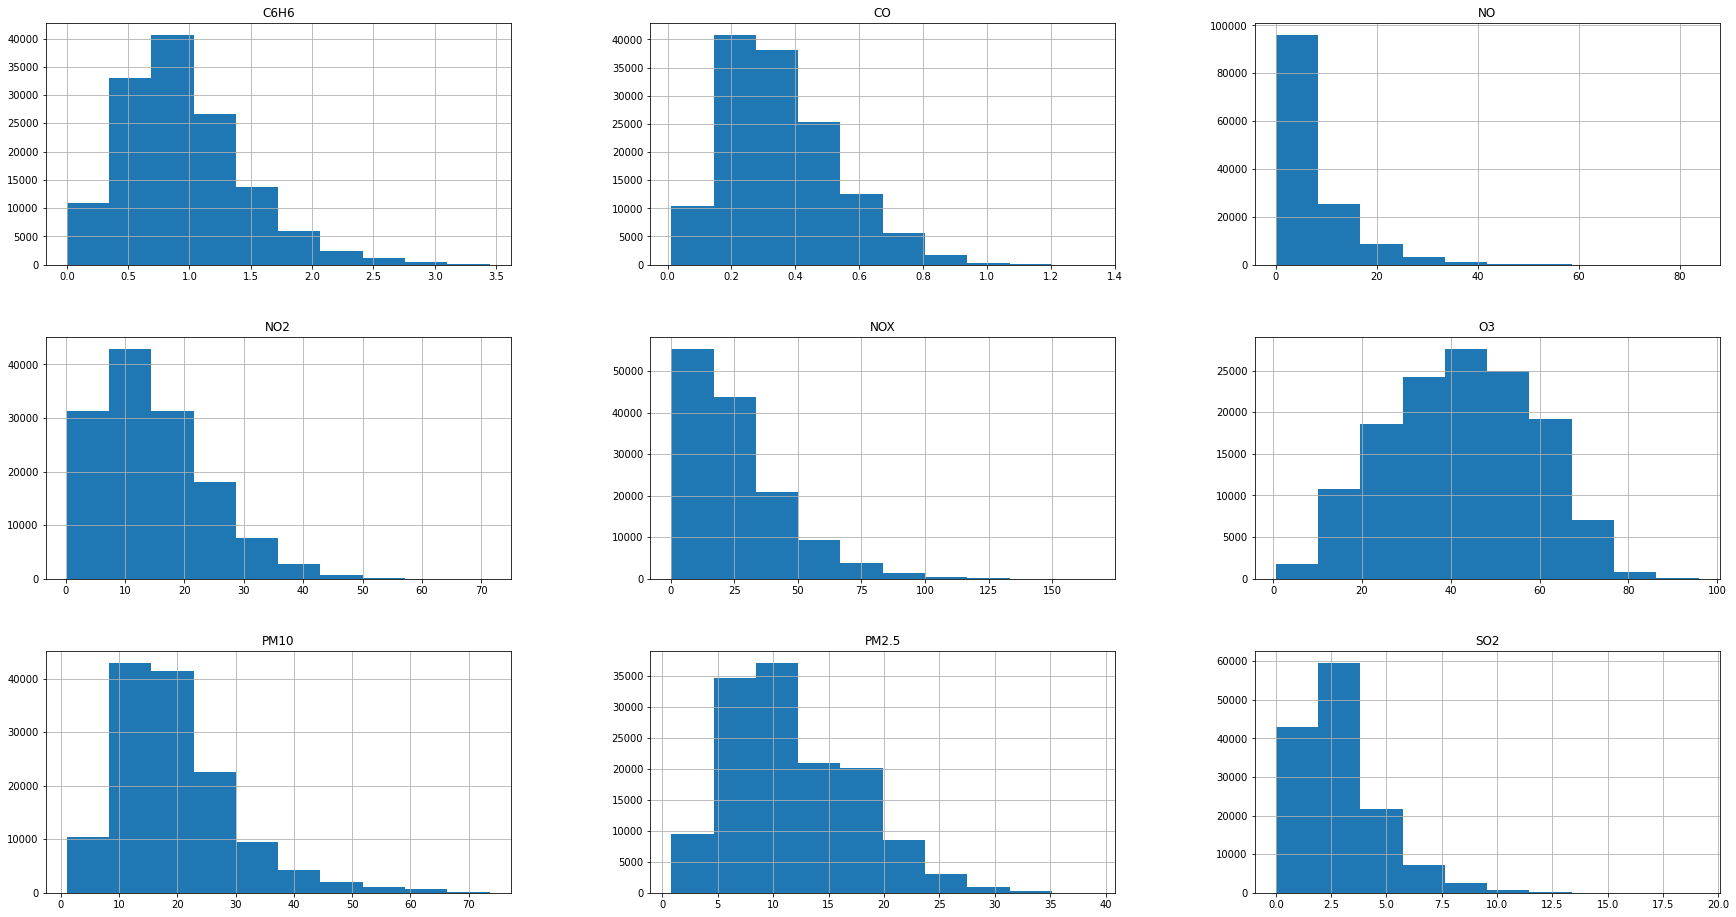

In [7]:
aire_data[['NO',	'SO2',	'NO2',	'NOX',	'CO',	'O3',	'PM2.5', 'PM10',	'C6H6']].hist(figsize=(30,16))
plt.show()

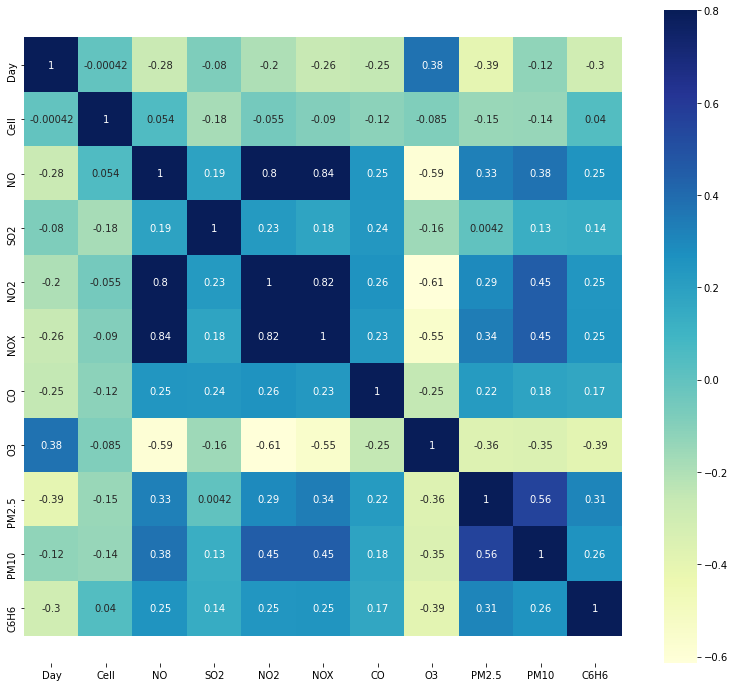

In [8]:
#correlation matrix
corrmat = aire_data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu", annot=True);

# Para que se muestre correctamente
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()



---



In [9]:
# VUELOS
# Cargamos el archivo
vuelos_data = pd.read_json('final_flights_dataset.json')
print(len(vuelos_data))
vuelos_data.head()

264690


Day  Cell    Velocity      Altitude  ICAO24
0    1     1  233.235547  11410.053529     136
1    1     2  225.379147  11235.690000       6
2    1     3  229.229098  12593.955000       4
3    1     4  226.117806  12272.010000       4
4    1     5  218.804393  11948.948276      29

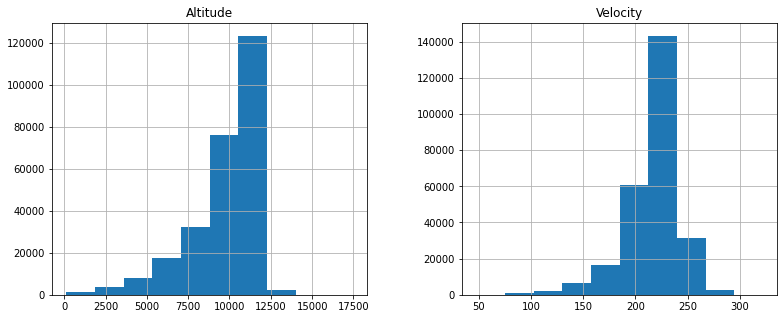

In [10]:
vuelos_data[['Altitude', 'Velocity']].hist(figsize=(13,5))
plt.show()

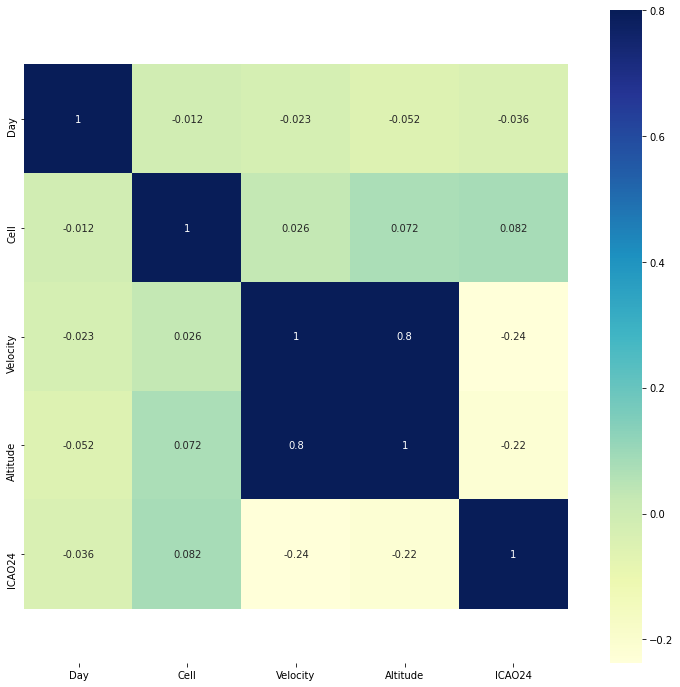

In [11]:
#correlation matrix
corrmat = vuelos_data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu", annot=True);

# Para que se muestre correctamente
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()


---



In [12]:
# JOIN de los dos dataframes con los campos celda y dia
data_combinado = pd.merge(aire_data, vuelos_data,  how='left', left_on=['Day','Cell'], right_on = ['Day','Cell'])

In [13]:
# Eliminamos las entradas cuyas mediciones son nulas
data_combinado = data_combinado[data_combinado['ICAO24'].notna()]

In [14]:
print(len(data_combinado))
data_combinado.sample(5)

127089


Day  Cell         NO  ...    Velocity      Altitude  ICAO24
134383   30  7618   3.509244  ...  215.706907   8651.965714     7.0
6879      2  5377   8.616072  ...  211.153553  10029.925263    19.0
102292   23  7045   4.254796  ...  224.558978  10226.463333    18.0
2920      1  6132  10.896626  ...  228.876674   9757.278621    29.0
74106    17  5266   4.272685  ...  212.684083  10055.860000    18.0

[5 rows x 14 columns]

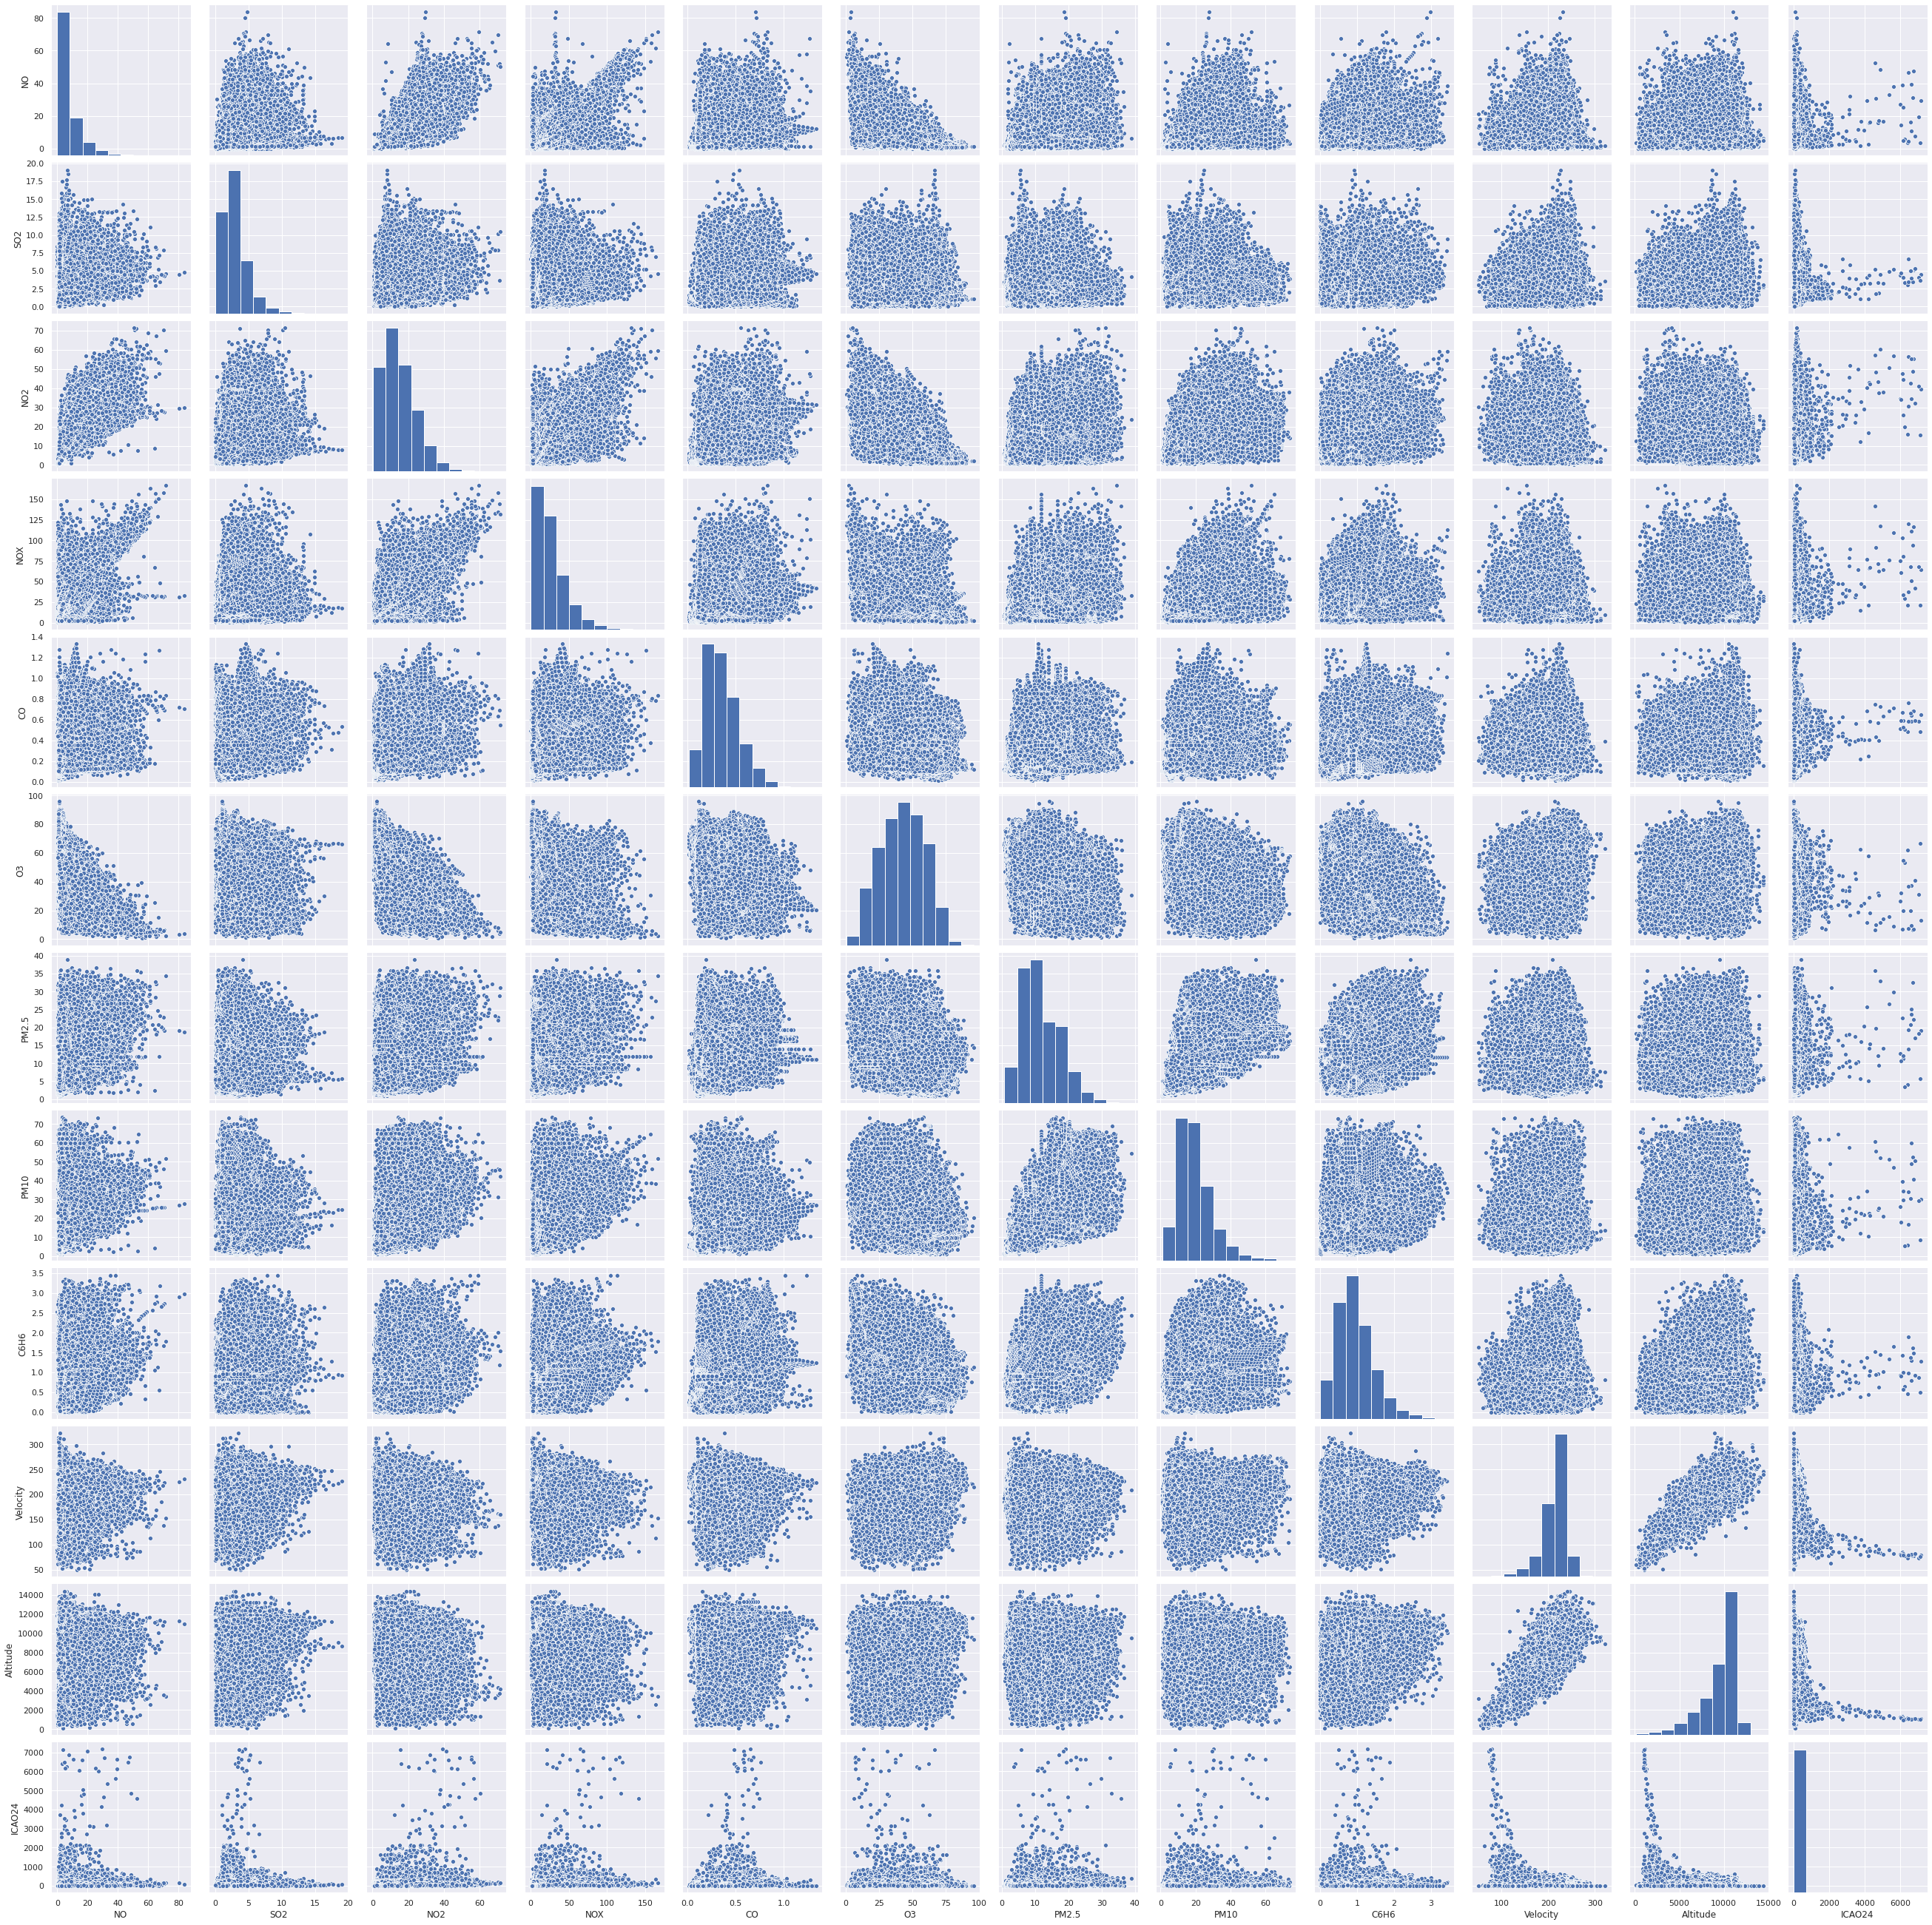

In [16]:
sns.set()
cols = ["NO", "SO2", 'NO2',	'NOX',	'CO',	'O3',	'PM2.5',	'PM10',	'C6H6', 'Velocity', 'Altitude', 'ICAO24']
sns.pairplot(data_combinado[cols], height = 3)
plt.show();

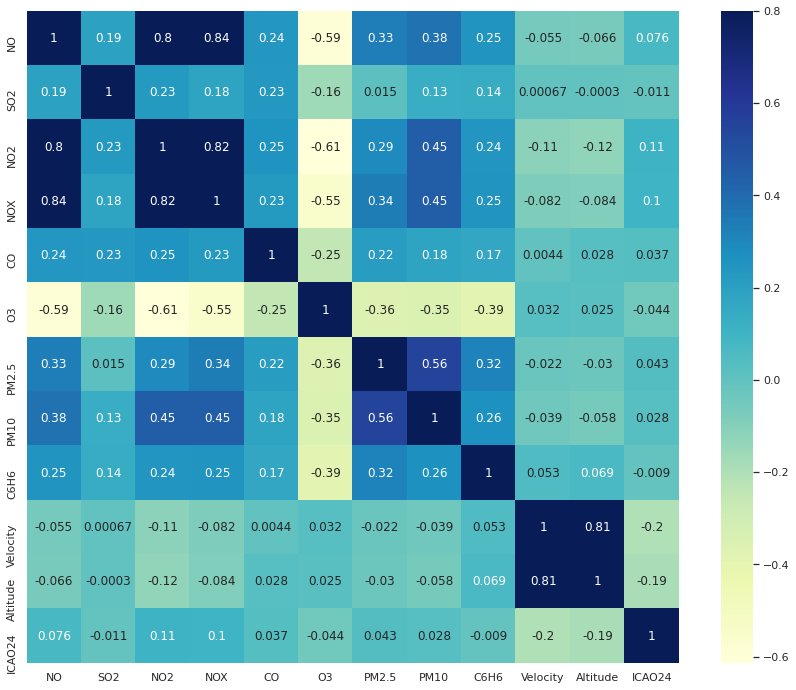

In [17]:
#correlation matrix
corrmat = data_combinado[["NO", "SO2", 'NO2',	'NOX',	'CO',	'O3',	'PM2.5',	'PM10',	'C6H6', 'Velocity', 'Altitude', 'ICAO24']].corr(method='pearson')
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu", annot=True);

# Para que se muestre correctamente
bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()